In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
census = pd.read_csv('Dane/cenzus.csv')
census.head()

,stan,rok,liczba.ludności,powierzchnia
0,Alabama,2010,4785437,52420
1,Alabama,2011,4799069,52420
2,Alabama,2012,4815588,52420
3,Alabama,2013,4830081,52420
4,Alabama,2014,4841799,52420


In [13]:
divisions = pd.read_csv('Dane/cenzus-oddziały.csv')
divisions.head()

,stan,kod.pocztowy,region,oddział
0,Connecticut,CT,Northeast,New England
1,Maine,ME,Northeast,New England
2,Massachusetts,MA,Northeast,New England
3,New Hampshire,NH,Northeast,New England
4,Rhode Island,RI,Northeast,New England


Zadanie 1. Posortuj dane rosnąco według regionu i oddziału oraz malejąco wedlug liczby ludności. (Aby to zrobić, musisz połączyć ze sobą zbiory danych). Wynik zapisz w arkuszu Excel.

In [14]:
# Połączenie danych
census = census.merge(divisions, how='left')
census.head()

,stan,rok,liczba.ludności,powierzchnia,kod.pocztowy,region,oddział
0,Alabama,2010,4785437,52420,AL,South,East South Central
1,Alabama,2011,4799069,52420,AL,South,East South Central
2,Alabama,2012,4815588,52420,AL,South,East South Central
3,Alabama,2013,4830081,52420,AL,South,East South Central
4,Alabama,2014,4841799,52420,AL,South,East South Central


In [15]:
# Sortowanie  rosnąco według regionu i oddziału oraz malejąco według liczby ludności
census_sorted = census.sort_values(by=['region','oddział','liczba.ludności'], ascending=[True,True,False])
census_sorted.head()

,stan,rok,liczba.ludności,powierzchnia,kod.pocztowy,region,oddział
81,Illinois,2013,12895129,57914,IL,Midwest,East North Central
82,Illinois,2014,12884493,57914,IL,Midwest,East North Central
80,Illinois,2012,12882510,57914,IL,Midwest,East North Central
79,Illinois,2011,12867454,57914,IL,Midwest,East North Central
83,Illinois,2015,12858913,57914,IL,Midwest,East North Central


In [16]:
# Zapis danych w arkuszu Excela
census_sorted.to_excel('dane-wyjsciowe/cenzus-posortowane.xlsx')

Zadanie 2. Usuń pole kod.pocztowy z połączonego zbioru danych.

In [17]:
# Usunięcie pola kod.pocztowy ze zbioru połączonych danych
census = census.drop('kod.pocztowy', axis=1)
census.head()

,stan,rok,liczba.ludności,powierzchnia,region,oddział
0,Alabama,2010,4785437,52420,South,East South Central
1,Alabama,2011,4799069,52420,South,East South Central
2,Alabama,2012,4815588,52420,South,East South Central
3,Alabama,2013,4830081,52420,South,East South Central
4,Alabama,2014,4841799,52420,South,East South Central


Zadanie 3. Utwórz nową kolumnę gęstość.zaludnienia, która będzie równa liczbie ludności podzielonej przez powierzchnię.

In [18]:
# Utworzenie kolumny gęstość.zaludnienia, której wartości są równie liczbie ludności podzielonej przez powierzchnię
census['gęstość.zaludnienia'] = census['liczba.ludności']/census['powierzchnia']
census.head()

,stan,rok,liczba.ludności,powierzchnia,region,oddział,gęstość.zaludnienia
0,Alabama,2010,4785437,52420,South,East South Central,91.290290
1,Alabama,2011,4799069,52420,South,East South Central,91.550343
2,Alabama,2012,4815588,52420,South,East South Central,91.865471
3,Alabama,2013,4830081,52420,South,East South Central,92.141950
4,Alabama,2014,4841799,52420,South,East South Central,92.365490


Zadanie 4. Zwizualizuj relację między powierzchnią a populacją dla wszystkich obserwacji z 2015 roku.

In [19]:
# Przygotowanie danych
census_2015 = census[census['rok']==2015]
census_2015.head()

,stan,rok,liczba.ludności,powierzchnia,region,oddział,gęstość.zaludnienia
5,Alabama,2015,4852347,52420,South,East South Central,92.566711
11,Alaska,2015,737498,665384,West,Pacific,1.108380
17,Arizona,2015,6829676,113990,West,Mountain,59.914694
23,Arkansas,2015,2978048,53179,South,West South Central,56.000451
29,California,2015,38918045,163695,West,Pacific,237.747304


<Axes: xlabel='powierzchnia', ylabel='liczba.ludności'>

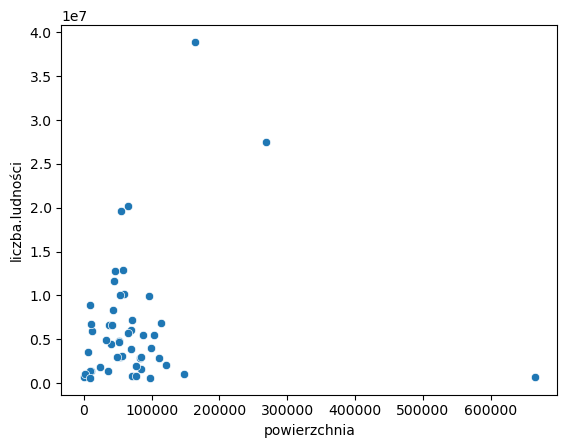

In [20]:
# Tworzenie wykresu rozrzutu
sns.scatterplot(x='powierzchnia', y='liczba.ludności', data=census_2015)

Zadanie 5. Znajdź całkowitą liczbę ludności w każdym regionie w 2015 roku.

In [21]:
# Znajdowanie łącznej liczby mieszkańców w regionach USA w 2015 roku
census_2015[['region','liczba.ludności']].groupby('region').sum()

,liczba.ludności
region,
Midwest,67860583
Northeast,56034684
South,120997341
West,75742555


Zadanie 6. Utwórz tabelę zawierającą nazwy stanów i liczbę ludności, w której liczba ludności z każdego roku od 2010 do 2015 przechowywana jest w osobnej kolumnie.

In [22]:
census.pivot_table(index='stan', columns='rok', values='liczba.ludności').reset_index()

rok,stan,2010,2011,2012,2013,2014,2015
0,Alabama,4785437,4799069,4815588,4830081,4841799,4852347
1,Alaska,713910,722128,730443,737068,736283,737498
2,Arizona,6407172,6472643,6554978,6632764,6730413,6829676
3,Arkansas,2921964,2940667,2952164,2959400,2967392,2978048
4,California,37319502,37638369,37948800,38260787,38596972,38918045
5,Colorado,5047349,5121108,5192647,5269035,5350101,5450623
6,Connecticut,3579114,3588283,3594547,3594841,3594524,3587122
7,Delaware,899593,907381,915179,923576,932487,941252
8,District of Columbia,605226,619800,634924,650581,662328,675400
9,Florida,18845537,19053237,19297822,19545621,19845911,20209042
